### Distribution of ender pearl trades

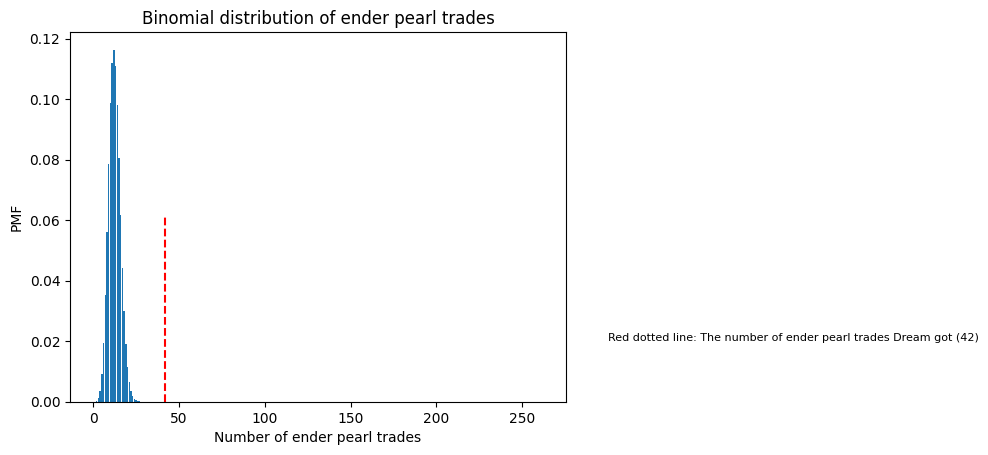

In [2]:
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binom

# Set the parameters for the binomial distribution 
n = 262  # Number of trials
p = 20/423  # Probability of success
dreams_result = 42 # the number of successful ender pearl trades Dream got

# x values
x_values = list(range(0, n+1))
y_values = [binom.pmf(x, n, p) for x in x_values]

# plot the graph
plt.bar(x_values, y_values)
plt.axvline(dreams_result, color='r', linestyle='--', ymax = 0.5)
plt.xlabel("Number of ender pearl trades")
plt.ylabel("PMF")
plt.text(300, 0.02, "Red dotted line: The number of ender pearl trades Dream got (42)", fontsize=8, color='black')
plt.title("Binomial distribution of ender pearl trades")

plt.show()

#### plot for pmf >= some threshold

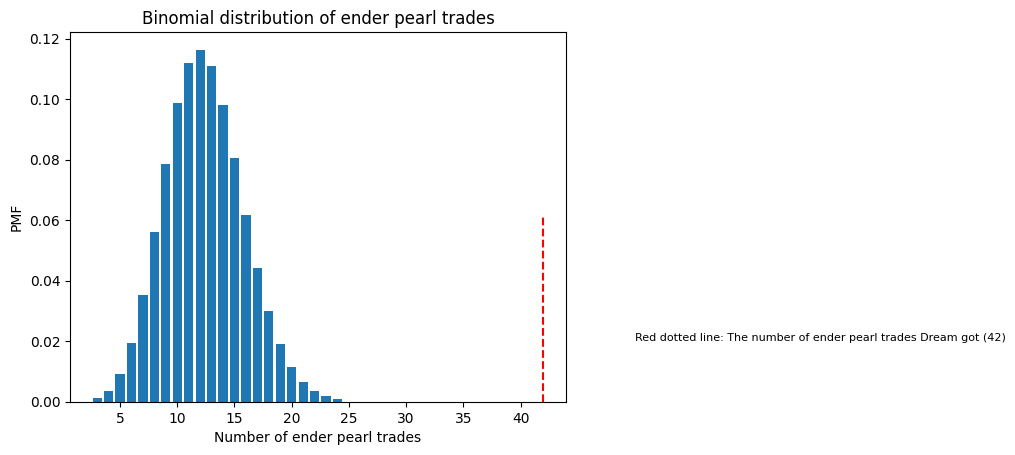

In [3]:
#import matplotlib.pyplot as plt
#from scipy.stats import binom

# Set the parameters for the binomial distribution
# n = 262  # Number of trials
# p = 20/423  # Probability of success
threshold = 0.0005

# x values and y values
# x_values = list(range(0, n+1))
# y_values = [binom.pmf(x, n, p) for x in x_values]

# filter
new_x_values = [x for x in x_values if y_values[x] >= threshold]
new_y_values = [y for y in y_values if y>= threshold]

# plot the graph
plt.bar(new_x_values, new_y_values)
plt.axvline(dreams_result, color='r', linestyle='--', ymax = 0.5)
plt.xlabel("Number of ender pearl trades")
plt.ylabel("PMF")
plt.text(50, 0.02, "Red dotted line: The number of ender pearl trades Dream got (42)", fontsize=8, color='black')
plt.title("Binomial distribution of ender pearl trades")
plt.show()

#### Code simulation for distribution of ender pearl trades

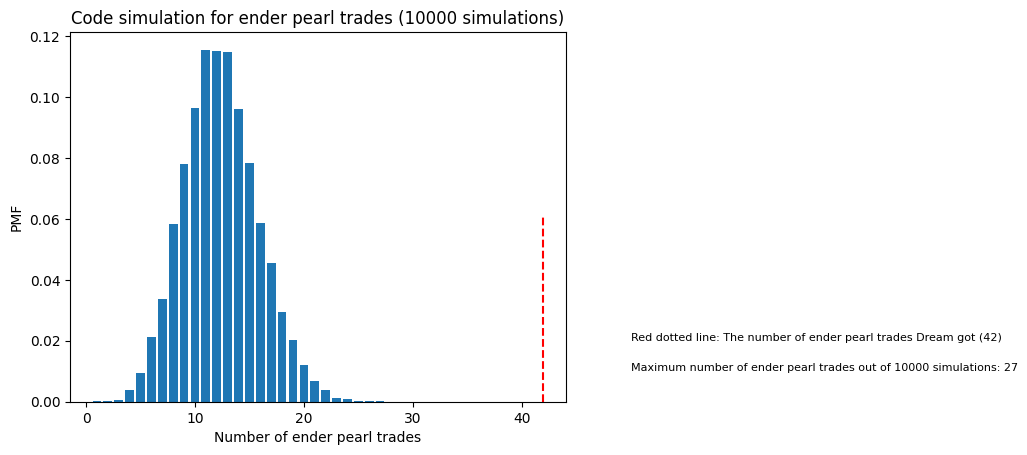

In [4]:
import random
from collections import Counter

# set the parameters
number_of_simulation = 10000
data = [] # storing no. of trades for each trial, elements could repeat
# n = 262
# p = 20/423

# repeat simulation
for i in range(number_of_simulation):
    success_num = 0
    for j in range(n):
        if random.random() < p:
            success_num += 1
    data.append(success_num)

# clean up the data
dict = Counter(data)
x_values = list(dict.keys())
y_values = list(y/number_of_simulation for y in dict.values()) # turn frequency into relative frequency

# find max
max_x = max(x_values)

# plot the graph
plt.bar(x_values, y_values)
plt.title(f"Code simulation for ender pearl trades ({number_of_simulation} simulations)")
plt.axvline(dreams_result, color='r', linestyle='--', ymax = 0.5)
plt.xlabel("Number of ender pearl trades")
plt.ylabel("PMF")
plt.text(50, 0.02, "Red dotted line: The number of ender pearl trades Dream got (42)", fontsize=8, color='black')
plt.text(50, 0.01, f"Maximum number of ender pearl trades out of {number_of_simulation} simulations: {max_x}", fontsize=8, color='black')
plt.show()


In [26]:
#### Code simulation for distribution of ender pearl trades with deduced modified probability

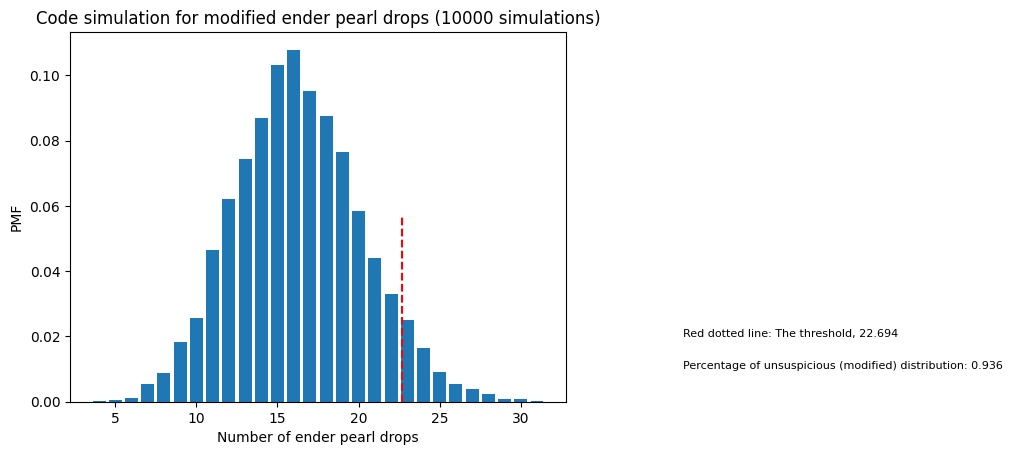

In [25]:
import random
from collections import Counter
import math

# set the parameters
number_of_simulation = 10000
data = [] # storing no. of success of each trial, elements could repeat, every trial has n = 305
n = 262
p = 20/423
m = 1.31332  # modify constant
t = n*p + 3*math.sqrt(n*p*(1-p)) # threshold

# simulate data
for i in range(number_of_simulation):
    success_num = 0
    for j in range(n):
        if random.random() < p*m:
            success_num += 1
    data.append(success_num)

# clean up the data
dict = Counter(data)
x_values = list(dict.keys())
y_values = list(y/number_of_simulation for y in dict.values()) # turn frequency into relative frequency

max_x = max(x_values)

# plot the threshold and % of distribution less than the threshold
sum = 0
for x,y in dict.items():
    if x <= t:
        sum += y
unsuspicious_percentage = sum/number_of_simulation
plt.axvline(t, color='r', linestyle='--', ymax = 0.5)
plt.text(40, 0.02, f"Red dotted line: The threshold, {t:.3f}", fontsize=8, color='black')
plt.text(40, 0.01, f"Percentage of unsuspicious (modified) distribution: {unsuspicious_percentage}", fontsize=8, color='black')

# plot the graph
plt.bar(x_values, y_values)
plt.title(f"Code simulation for modified ender pearl drops ({number_of_simulation} simulations)")
plt.xlabel("Number of ender pearl drops")
plt.ylabel("PMF")

plt.show()